# Introduction to Human Activity Recognition

Here we will explore some common ways of preprocessing human activity recognition data.

Using the example data we will learn:
* how to merge multiple files into one large DataFrame
* how to split data into sliding windows
* how to quickly extract features from a window
* how to set the number of classes considered for classification
* how to build a simple Random Forest Classifier and train it on HAR data
* how to build a simple CNN and train it on HAR data 

Bear in mind that the sample data offered is not cleaned or high quality. You should not use it in your own experiments but it is useful for this tutorial.

You will need the following packages: 
* tsfresh
* scikit-learn
* tensorflow

#### Basic imports

In [84]:
import pandas as pd
import numpy as np
import tsfresh
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import tensorflow as tf

import os
import glob
import matplotlib.pyplot as plt

# keras goodies
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv1D, Dropout, MaxPooling1D, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras import regularizers
from tensorflow.keras import metrics as kmetrics
import tensorflow.keras.backend as K

## Loading multiple files into one large DataFrame

At this stage you should only be working with clean data, saved in the format required for Coursework 1. An example of such data can be found in the Data/Clean/ folder.

Reset the index of the base DataFrame.

In [86]:
base_df = pd.DataFrame()

clean_data_folder =  '.\Data\clean\last\last'
for filename in os.listdir(clean_data_folder):
    full_path = f"{clean_data_folder}/{filename}"
    print(full_path)
    
     #load data into a DataFrame
    new_df = pd.read_csv(full_path)
    
    # merge into the base DataFrame
    base_df = pd.concat([base_df, new_df])

.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-10-2021_18-46-31.csv
.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-10-2021_18-46-39.csv
.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-10-2021_18-46-48.csv
.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-10-2021_18-46-56.csv
.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-10-2021_18-47-05.csv
.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-10-2021_18-47-13.csv
.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-10-2021_18-47-21.csv
.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-10-2021_18-54-16.csv
.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-10-2021_18-54-23.csv
.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-10-2021_18-54-30.csv
.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-10-2021_18-54-39.csv
.\Data\clean\last\last/Respeck_s1724607_Falling on the right_06-1

In [88]:
base_df

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
0,1633542390175,-0.120850,-0.583313,-0.080383,3.453125,-3.156250,10.671875,Respeck,Falling on the right,46,s1724607,NaN,last\Respeck_s1724607_Falling on the right_06-...
1,1633542390205,-0.288818,-0.629944,-0.104065,-12.890625,1.531250,17.828125,Respeck,Falling on the right,46,s1724607,NaN,last\Respeck_s1724607_Falling on the right_06-...
2,1633542390249,-0.347900,-0.615784,-0.163391,-23.281250,-0.593750,18.187500,Respeck,Falling on the right,46,s1724607,NaN,last\Respeck_s1724607_Falling on the right_06-...
3,1633542390293,-0.302246,-0.660706,-0.009583,-42.109375,-3.500000,31.406250,Respeck,Falling on the right,46,s1724607,NaN,last\Respeck_s1724607_Falling on the right_06-...
4,1633542390325,-0.232178,-0.321838,-0.760315,-3.921875,5.453125,32.500000,Respeck,Falling on the right,46,s1724607,NaN,last\Respeck_s1724607_Falling on the right_06-...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,1633544038720,1.049316,0.050720,0.104187,-2.312500,4.890625,-15.109375,Respeck,Falling on the right,46,s1724607,NaN,last\Respeck_s1724607_Falling on the right_06-...
22,1633544038780,1.043701,0.053894,0.065613,-5.078125,5.453125,-17.906250,Respeck,Falling on the right,46,s1724607,NaN,last\Respeck_s1724607_Falling on the right_06-...
23,1633544038798,1.131348,0.036072,0.089050,-2.812500,22.531250,-14.125000,Respeck,Falling on the right,46,s1724607,NaN,last\Respeck_s1724607_Falling on the right_06-...
24,1633544038839,1.164795,-0.080872,0.097839,9.703125,12.343750,-2.953125,Respeck,Falling on the right,46,s1724607,NaN,last\Respeck_s1724607_Falling on the right_06-...


In [89]:
base_df.reset_index(drop=True, inplace=True)

In [94]:
base_df.to_csv(".\Data\clean\Respeck_s1724607_Falling on the right_06-10-2021_18-46-31")

In [82]:
#base_df = pd.DataFrame()

#clean_data_folder = (glob.glob('./Data/2021/**/*.csv', recursive=True))

In [48]:
for filename in clean_data_folder[:]:
    if 'Thingy' in filename:
        clean_data_folder.remove(filename)
    else:
        continue


In [49]:
len(clean_data_folder)

650

In [50]:
for filename in clean_data_folder:
    print(filename)
    
    # load data into a DataFrame
    new_df = pd.read_csv(filename)
    
    # merge into the base DataFrame
    base_df = pd.concat([base_df, new_df])

./Data/2021\s1541031\Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43.csv
./Data/2021\s1541031\Respeck_s1541031_Descending stairs_06-10-2021_11-25-05.csv
./Data/2021\s1541031\Respeck_s1541031_Desk work_06-10-2021_11-04-49.csv
./Data/2021\s1541031\Respeck_s1541031_Falling on knees_06-10-2021_15-48-40.csv.csv
./Data/2021\s1541031\Respeck_s1541031_Falling on the back_06-10-2021_15-55-24.csv.csv
./Data/2021\s1541031\Respeck_s1541031_Falling on the left_06-10-2021_16-04-18.csv.csv
./Data/2021\s1541031\Respeck_s1541031_Falling on the right_06-10-2021_16-10-42.csv.csv
./Data/2021\s1541031\Respeck_s1541031_Lying down left_06-10-2021_14-30-04.csv
./Data/2021\s1541031\Respeck_s1541031_Lying down on back_06-10-2021_11-15-13.csv
./Data/2021\s1541031\Respeck_s1541031_Lying down on stomach_06-10-2021_14-30-50.csv
./Data/2021\s1541031\Respeck_s1541031_Lying down right_06-10-2021_14-27-40.csv
./Data/2021\s1541031\Respeck_s1541031_Movement_06-10-2021_11-11-18.csv
./Data/2021\s1541031\Respeck_s15410

./Data/2021\s1721256\Respeck_s1721256_Running_02-10-2021_17-26-10.csv
./Data/2021\s1721256\Respeck_s1721256_Sitting bent backward_02-10-2021_17-39-15.csv
./Data/2021\s1721256\Respeck_s1721256_Sitting bent forward_01-10-2021_18-46-19.csv
./Data/2021\s1721256\Respeck_s1721256_Sitting_01-10-2021_18-42-57.csv
./Data/2021\s1721256\Respeck_s1721256_Standing_01-10-2021_19-00-30.csv
./Data/2021\s1721256\Respeck_s1721256_Walking at normal speed_02-10-2021_22-12-45.csv
./Data/2021\s1724067\Respeck_s1724067_Desk work_03-10-2021_16-42-32.csv
./Data/2021\s1724067\Respeck_s1724067_Falling on knees_03-10-2021_16-49-28.csv
./Data/2021\s1724067\Respeck_s1724067_Lying down left_03-10-2021_16-31-15.csv
./Data/2021\s1724067\Respeck_s1724067_Lying down on back_03-10-2021_16-39-39.csv
./Data/2021\s1724067\Respeck_s1724067_Lying down on stomach_03-10-2021_16-38-06.csv
./Data/2021\s1724067\Respeck_s1724067_Lying down right_03-10-2021_16-32-52.csv
./Data/2021\s1724067\Respeck_s1724067_Sitting bent backward_03-

./Data/2021\s1801931\Respeck_s1801931_Desk work_05-10-2021_23-13-57.csv
./Data/2021\s1801931\Respeck_s1801931_Falling on knees_05-10-2021_23-21-11.csv
./Data/2021\s1801931\Respeck_s1801931_Falling on the back_06-10-2021_00-07-22.csv
./Data/2021\s1801931\Respeck_s1801931_Falling on the left_05-10-2021_23-49-52.csv
./Data/2021\s1801931\Respeck_s1801931_Falling on the right_05-10-2021_23-56-55.csv
./Data/2021\s1801931\Respeck_s1801931_Lying down left_05-10-2021_23-02-37.csv
./Data/2021\s1801931\Respeck_s1801931_Lying down on back_05-10-2021_23-00-21.csv
./Data/2021\s1801931\Respeck_s1801931_Lying down on stomach_05-10-2021_23-07-46.csv
./Data/2021\s1801931\Respeck_s1801931_Lying down right_05-10-2021_23-04-30.csv
./Data/2021\s1801931\Respeck_s1801931_Movement_05-10-2021_23-12-29.csv
./Data/2021\s1801931\Respeck_s1801931_Running_06-10-2021_00-28-00.csv
./Data/2021\s1801931\Respeck_s1801931_Sitting bent backward_05-10-2021_22-58-02.csv
./Data/2021\s1801931\Respeck_s1801931_Sitting bent forw

./Data/2021\s1841064\Respeck_s1841064_Falling on knees_04-10-2021_16-22-09.csv
./Data/2021\s1841064\Respeck_s1841064_Falling on the back_04-10-2021_16-32-04.csv
./Data/2021\s1841064\Respeck_s1841064_Falling on the left_04-10-2021_16-25-43.csv
./Data/2021\s1841064\Respeck_s1841064_Falling on the right_04-10-2021_16-28-13.csv
./Data/2021\s1841064\Respeck_s1841064_Lying down left_29-09-2021_15-27-55.csv
./Data/2021\s1841064\Respeck_s1841064_Lying down on back_29-09-2021_15-27-14.csv
./Data/2021\s1841064\Respeck_s1841064_Lying down on stomach_29-09-2021_13-33-46.csv
./Data/2021\s1841064\Respeck_s1841064_Lying down right_06-10-2021_15-06-57.csv
./Data/2021\s1841064\Respeck_s1841064_Movement_29-09-2021_13-54-37.csv
./Data/2021\s1841064\Respeck_s1841064_Running_29-09-2021_13-46-50.csv
./Data/2021\s1841064\Respeck_s1841064_Sitting bent backward_06-10-2021_14-57-36.csv
./Data/2021\s1841064\Respeck_s1841064_Sitting bent forward_06-10-2021_14-59-27.csv
./Data/2021\s1841064\Respeck_s1841064_Sittin

./Data/2021\s1870467\Respeck_s1870467_Falling on the back_05-10-2021_09-31-28.csv
./Data/2021\s1870467\Respeck_s1870467_Falling on the left_05-10-2021_09-35-15.csv
./Data/2021\s1870467\Respeck_s1870467_Falling on the right_05-10-2021_09-27-37.csv
./Data/2021\s1870467\Respeck_s1870467_Lying down left_29-09-2021_11-47-37.csv
./Data/2021\s1870467\Respeck_s1870467_Lying down on back_29-09-2021_11-46-48.csv
./Data/2021\s1870467\Respeck_s1870467_Lying down on stomach_29-09-2021_11-49-18.csv
./Data/2021\s1870467\Respeck_s1870467_Lying down right_29-09-2021_11-48-27.csv
./Data/2021\s1870467\Respeck_s1870467_Movement_29-09-2021_11-56-20.csv
./Data/2021\s1870467\Respeck_s1870467_Running_07-10-2021_09-48-21.csv
./Data/2021\s1870467\Respeck_s1870467_Sitting bent backward_29-09-2021_11-45-03.csv
./Data/2021\s1870467\Respeck_s1870467_Sitting bent forward_29-09-2021_11-44-15.csv
./Data/2021\s1870467\Respeck_s1870467_Sitting_29-09-2021_11-43-20.csv
./Data/2021\s1870467\Respeck_s1870467_Standing_29-09-

./Data/2021\s2119637\Respeck_s2119637_Lying down right_03-10-2021_23-18-45.csv
./Data/2021\s2119637\Respeck_s2119637_Movement_03-10-2021_23-23-43.csv
./Data/2021\s2119637\Respeck_s2119637_Running_03-10-2021_23-39-21.csv
./Data/2021\s2119637\Respeck_s2119637_Sitting bent backward_03-10-2021_23-15-46.csv
./Data/2021\s2119637\Respeck_s2119637_Sitting bent forward_03-10-2021_23-14-56.csv
./Data/2021\s2119637\Respeck_s2119637_Sitting_03-10-2021_23-13-48.csv
./Data/2021\s2119637\Respeck_s2119637_Standing_03-10-2021_23-16-44.csv
./Data/2021\s2119637\Respeck_s2119637_Walking at normal speed_03-10-2021_23-38-30.csv
./Data/2021\s2125423\Respeck_s2125423_Climbing stairs_03-10-2021_17-21-54.csv
./Data/2021\s2125423\Respeck_s2125423_Descending stairs_03-10-2021_17-20-21.csv
./Data/2021\s2125423\Respeck_s2125423_Desk work_03-10-2021_16-06-40.csv
./Data/2021\s2125423\Respeck_s2125423_Falling on knees_03-10-2021_16-09-04.csv
./Data/2021\s2125423\Respeck_s2125423_Falling on the back_03-10-2021_16-35-19

In [51]:
base_df.reset_index(drop=True, inplace=True)
base_df
#base_df.drop(base_df.tail(3).index,inplace=True)

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,notes,recording_id
0,1.633516e+12,-0.763184,-0.014465,0.079773,22.062500,9.484375,15.671875,Respeck,Climbing stairs,12.0,s1541031,NaN,Respeck_s1541031_Climbing stairs_06-10-2021_11...
1,1.633516e+12,-0.794678,0.042175,0.153503,7.578125,-11.687500,6.468750,Respeck,Climbing stairs,12.0,s1541031,NaN,Respeck_s1541031_Climbing stairs_06-10-2021_11...
2,1.633516e+12,-0.748291,-0.076233,0.016296,15.781250,-9.375000,4.890625,Respeck,Climbing stairs,12.0,s1541031,NaN,Respeck_s1541031_Climbing stairs_06-10-2021_11...
3,1.633516e+12,-0.949707,-0.011536,0.012390,6.046875,-7.031250,1.531250,Respeck,Climbing stairs,12.0,s1541031,NaN,Respeck_s1541031_Climbing stairs_06-10-2021_11...
4,1.633516e+12,-1.209961,0.216492,0.016296,-19.218750,-6.078125,1.421875,Respeck,Climbing stairs,12.0,s1541031,NaN,Respeck_s1541031_Climbing stairs_06-10-2021_11...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496017,1.632921e+12,-0.567139,-0.151917,-0.810608,-0.281250,-1.078125,0.281250,Respeck,Lying down left,7.0,s2181154,NaN,Respeck_s2181154_Lying down left_29-09-2021_14...
496018,1.632921e+12,-0.566162,-0.148743,-0.810852,-0.156250,-0.953125,0.187500,Respeck,Lying down left,7.0,s2181154,NaN,Respeck_s2181154_Lying down left_29-09-2021_14...
496019,1.632921e+12,-0.569336,-0.153625,-0.805725,-0.062500,-0.875000,0.203125,Respeck,Lying down left,7.0,s2181154,NaN,Respeck_s2181154_Lying down left_29-09-2021_14...
496020,1.632921e+12,-0.562500,-0.152161,-0.808655,-0.109375,-1.046875,0.187500,Respeck,Lying down left,7.0,s2181154,NaN,Respeck_s2181154_Lying down left_29-09-2021_14...


In [52]:
base_df.drop('notes', inplace=True, axis=1)

In [53]:
base_df.loc[base_df['gyro_z'].isnull()]

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,recording_id
486096,1.633297e+12,NaN,NaN,NaN,NaN,NaN,NaN,Respeck,Sitting bent backward,5.0,s2173036,Respeck_s2173036_Sitting bent backward_03-10-2...
492901,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
base_df.loc[492902]

timestamp                                          1633630000000.0
accel_x                                                  -0.123291
accel_y                                                   -0.99469
accel_z                                                   0.075378
gyro_x                                                    -3.46875
gyro_y                                                  -10.578125
gyro_z                                                      2.6875
sensor_type                                                Respeck
activity_type                                  Falling on the back
activity_code                                                 47.0
subject_id                                                s2181154
recording_id     Respeck_s2181154_Falling on the back_07-10-202...
Name: 492902, dtype: object

In [55]:
base_df.loc[492900]

timestamp                                          1630000000000.0
accel_x                                                  -0.105713
accel_y                                                  -0.958557
accel_z                                                  -0.000549
gyro_x                                                   -3.984375
gyro_y                                                      -4.625
gyro_z                                                   -5.765625
sensor_type                                                Respeck
activity_type                                     Falling on knees
activity_code                                                 48.0
subject_id                                                s2181154
recording_id     Respeck_s2181154_Falling on knees_07-10-2021_1...
Name: 492900, dtype: object

In [56]:
base_df=base_df.dropna()

Now you can get a list of all recording ids, activities, sensor types and anything else you might need.

In [57]:
print(f"The data was collected using the sensors: {base_df.sensor_type.unique()}")
print(f"The data was collected for the activities: {base_df.activity_type.unique()}")
print(f"The number of unique recordings is: {len(base_df.recording_id.unique())}")
print(f"The subject IDs in the recordings are: {len(base_df.subject_id.unique())}")

The data was collected using the sensors: ['Respeck']
The data was collected for the activities: ['Climbing stairs' 'Descending stairs' 'Desk work' 'Falling on knees'
 'Falling on the back' 'Falling on the left' 'Falling on the right'
 'Lying down left' 'Lying down on back' 'Lying down on stomach'
 'Lying down right' 'Movement' 'Running' 'Sitting bent backward'
 'Sitting bent forward' 'Sitting' 'Standing' 'Walking at normal speed']
The number of unique recordings is: 2638
The subject IDs in the recordings are: 39


#set test set

In [58]:
test_df = base_df.loc[base_df['subject_id']=='s2181154']

In [59]:
test_df


,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,recording_id
489788,1.632920e+12,0.237793,-0.807678,0.065613,6.578125,-2.640625,2.843750,Respeck,Climbing stairs,12.0,s2181154,Respeck_s2181154_Climbing stairs_29-09-2021_14...
489789,1.632920e+12,0.325684,-0.861633,0.117615,6.734375,-0.312500,8.671875,Respeck,Climbing stairs,12.0,s2181154,Respeck_s2181154_Climbing stairs_29-09-2021_14...
489790,1.632920e+12,0.301270,-0.952942,0.182312,-2.875000,-5.968750,4.593750,Respeck,Climbing stairs,12.0,s2181154,Respeck_s2181154_Climbing stairs_29-09-2021_14...
489791,1.632920e+12,0.191650,-0.951233,0.157166,3.750000,-4.265625,-0.875000,Respeck,Climbing stairs,12.0,s2181154,Respeck_s2181154_Climbing stairs_29-09-2021_14...
489792,1.632920e+12,0.147461,-0.839905,0.049255,6.171875,-0.734375,-4.890625,Respeck,Climbing stairs,12.0,s2181154,Respeck_s2181154_Climbing stairs_29-09-2021_14...
...,...,...,...,...,...,...,...,...,...,...,...,...
496017,1.632921e+12,-0.567139,-0.151917,-0.810608,-0.281250,-1.078125,0.281250,Respeck,Lying down left,7.0,s2181154,Respeck_s2181154_Lying down left_29-09-2021_14...
496018,1.632921e+12,-0.566162,-0.148743,-0.810852,-0.156250,-0.953125,0.187500,Respeck,Lying down left,7.0,s2181154,Respeck_s2181154_Lying down left_29-09-2021_14...
496019,1.632921e+12,-0.569336,-0.153625,-0.805725,-0.062500,-0.875000,0.203125,Respeck,Lying down left,7.0,s2181154,Respeck_s2181154_Lying down left_29-09-2021_14...
496020,1.632921e+12,-0.562500,-0.152161,-0.808655,-0.109375,-1.046875,0.187500,Respeck,Lying down left,7.0,s2181154,Respeck_s2181154_Lying down left_29-09-2021_14...


In [60]:
base_df.drop(test_df.index, inplace=True)

C:\Users\18605\miniconda3\envs\py3iaml\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
base_df

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,recording_id
0,1.633516e+12,-0.763184,-0.014465,0.079773,22.062500,9.484375,15.671875,Respeck,Climbing stairs,12.0,s1541031,Respeck_s1541031_Climbing stairs_06-10-2021_11...
1,1.633516e+12,-0.794678,0.042175,0.153503,7.578125,-11.687500,6.468750,Respeck,Climbing stairs,12.0,s1541031,Respeck_s1541031_Climbing stairs_06-10-2021_11...
2,1.633516e+12,-0.748291,-0.076233,0.016296,15.781250,-9.375000,4.890625,Respeck,Climbing stairs,12.0,s1541031,Respeck_s1541031_Climbing stairs_06-10-2021_11...
3,1.633516e+12,-0.949707,-0.011536,0.012390,6.046875,-7.031250,1.531250,Respeck,Climbing stairs,12.0,s1541031,Respeck_s1541031_Climbing stairs_06-10-2021_11...
4,1.633516e+12,-1.209961,0.216492,0.016296,-19.218750,-6.078125,1.421875,Respeck,Climbing stairs,12.0,s1541031,Respeck_s1541031_Climbing stairs_06-10-2021_11...
...,...,...,...,...,...,...,...,...,...,...,...,...
489783,1.633299e+12,0.207520,-0.837463,-0.187805,19.171875,-5.453125,3.281250,Respeck,Walking at normal speed,1.0,s2173036,Respeck_s2173036_Walking at normal speed_03-10...
489784,1.633299e+12,0.270752,-0.888977,-0.104065,16.000000,-7.265625,11.421875,Respeck,Walking at normal speed,1.0,s2173036,Respeck_s2173036_Walking at normal speed_03-10...
489785,1.633299e+12,0.252441,-0.919250,-0.085754,12.234375,0.000000,13.453125,Respeck,Walking at normal speed,1.0,s2173036,Respeck_s2173036_Walking at normal speed_03-10...
489786,1.633299e+12,0.254883,-0.848450,-0.084778,3.625000,0.109375,8.625000,Respeck,Walking at normal speed,1.0,s2173036,Respeck_s2173036_Walking at normal speed_03-10...


In [62]:
test_df.reset_index(drop=True, inplace=True)

In [65]:
base_df.reset_index(drop=True, inplace=True)

You can of course change the clean data folder to where you keep all the PDIoT data and you should be seeing a lot more subject IDs, unique recordings and activity types.

## Splitting data into sliding windows

The sliding window approach is one of the most efficient ways to process Human Activity Recognition data. We saw in the last notebook that sensor data comes in the form of Time Series. One single datapoint is not enough to represent an activity, we need a larger snapshot of the signal for that. The image below shows how a sliding window achieves that. 

![sliding windows](../Images/sliding_windows_complete.png "Sliding Windows")

The windows can have some amount of overlap, as shown in the picture, or they can have no overlap at all in which case they would be side-by-side.

Each window can now be treated as an input datapoint to whichever model you choose to train. 

### Watch out for separate recordings

You need to make sure that when you split your data into sliding windows you don't accidentally include two separate recordings in the same window. This would cause the signal from the first recording to suddenly "jump" to an unrelated value from the second recording. 

For this, you will have to first split up your dataset by recording (this is where the recording ID comes in), then you have to split each recording into sliding windows. At the end you can aggregate all of your resulting sliding windows in a large dataset.

### Sliding windows with Pandas 

Pandas conveniently offers built-in functions that help us create the sliding window data very easily.

In [76]:
example_recording = base_df[base_df.activity_code == 1]
# confim we only have one recording here
len(example_recording.recording_id.unique())

35

In [81]:
base_df.groupby(['recording_id']).mean()


,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,activity_code
recording_id,,,,,,,,
Respeck_s1541031_Climbing stairs_06-10-2021_11-25-43,1.633516e+12,-0.992925,0.140763,0.174926,-12.086828,0.171612,0.941022,12.0
Respeck_s1541031_Descending stairs_06-10-2021_11-25-05,1.633516e+12,-1.013545,-0.029249,-0.062397,11.538139,-0.277675,0.636930,13.0
Respeck_s1541031_Desk work_06-10-2021_11-04-49,1.633515e+12,-0.960177,0.123318,0.361155,-0.317159,0.005141,0.005041,31.0
Respeck_s1541031_Falling on knees_06-10-2021_15-46-44,1.633532e+12,0.310898,-0.824451,-0.154484,16.651855,4.131836,7.890381,48.0
Respeck_s1541031_Falling on knees_06-10-2021_15-46-54,1.633532e+12,0.266422,-0.420471,-0.382318,43.666941,4.775493,15.532895,48.0
...,...,...,...,...,...,...,...,...
respeck\Respeck_s1724607_Falling on the right_06-10-2021_18-57-58,1.633543e+12,0.645686,-0.385226,0.197486,-15.548678,6.655649,33.637620,6.0
respeck\Respeck_s1724607_Falling on the right_06-10-2021_18-58-07,1.633543e+12,0.691289,-0.337414,0.342374,-28.187500,9.358173,34.098557,6.0
respeck\Respeck_s1724607_Falling on the right_06-10-2021_18-58-15,1.633543e+12,0.715421,-0.227269,0.163288,-16.033053,2.117188,36.315505,6.0


In [79]:
example_recording.groupby()

TypeError: You have to supply one of 'by' and 'level'

In [67]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

large_enough_windows = [window for window in example_recording.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]

In [68]:
# we then get the windows with the required overlap

overlapping_windows = large_enough_windows[::step_size] 

In [69]:
# then we will append a window ID to each window
for window in overlapping_windows:
    window.loc[:, 'window_id'] = window_number
    window_number += 1

In [70]:
# now we concatenate all the resulting windows
final_sliding_windows = pd.concat(overlapping_windows).reset_index(drop=True)

In [71]:
final_sliding_windows

,timestamp,accel_x,accel_y,accel_z,gyro_x,gyro_y,gyro_z,sensor_type,activity_type,activity_code,subject_id,recording_id,window_id
0,1.633541e+12,-0.046875,-1.443420,0.414001,-2.937500,-0.687500,-7.703125,Respeck,Walking at normal speed,1.0,s1541031,Respeck_s1541031_Walking at normal speed_06-10...,0
1,1.633541e+12,0.284668,-1.784241,-0.093567,-32.359375,-9.015625,-5.875000,Respeck,Walking at normal speed,1.0,s1541031,Respeck_s1541031_Walking at normal speed_06-10...,0
2,1.633541e+12,0.425781,-0.830139,-0.248352,7.281250,-6.875000,-4.968750,Respeck,Walking at normal speed,1.0,s1541031,Respeck_s1541031_Walking at normal speed_06-10...,0
3,1.633541e+12,0.245361,-1.018860,-0.108948,3.609375,8.000000,10.390625,Respeck,Walking at normal speed,1.0,s1541031,Respeck_s1541031_Walking at normal speed_06-10...,0
4,1.633541e+12,0.195312,-1.100403,-0.045471,9.375000,11.265625,1.281250,Respeck,Walking at normal speed,1.0,s1541031,Respeck_s1541031_Walking at normal speed_06-10...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53345,1.633299e+12,0.318604,-1.484192,0.151550,-7.171875,8.953125,-14.843750,Respeck,Walking at normal speed,1.0,s2173036,Respeck_s2173036_Walking at normal speed_03-10...,1066
53346,1.633299e+12,0.726074,-1.094299,0.070496,-18.000000,-0.843750,-4.609375,Respeck,Walking at normal speed,1.0,s2173036,Respeck_s2173036_Walking at normal speed_03-10...,1066
53347,1.633299e+12,0.869141,-0.935608,-0.100403,-8.500000,-6.656250,1.125000,Respeck,Walking at normal speed,1.0,s2173036,Respeck_s2173036_Walking at normal speed_03-10...,1066
53348,1.633299e+12,0.538574,-0.902405,-0.572571,4.031250,-16.890625,11.984375,Respeck,Walking at normal speed,1.0,s2173036,Respeck_s2173036_Walking at normal speed_03-10...,1066


You can plot each window to see the signals. Here we will plot the first four windows of the walking activity.

In [72]:
first_four_windows = [group for _, group in final_sliding_windows[final_sliding_windows.window_id < 4].groupby("window_id")]

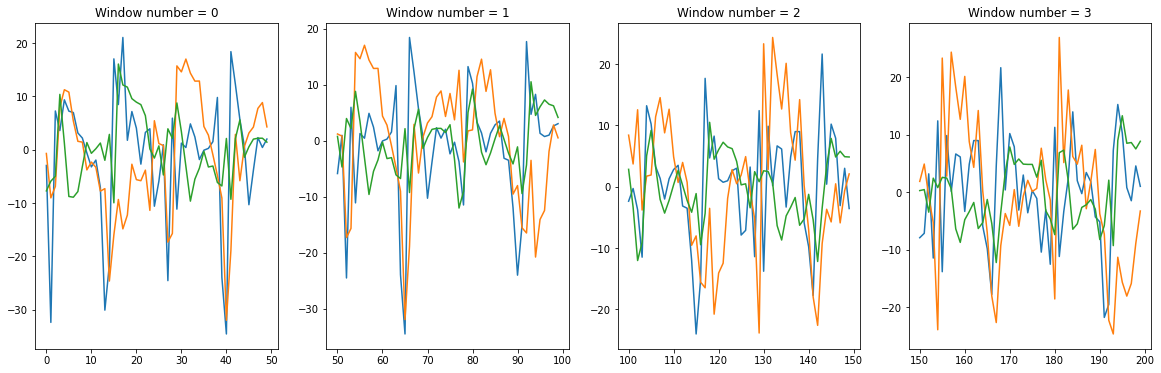

In [73]:
fig, ax = plt.subplots(1, 4, figsize=(20, 6))

for i in range(4):
    ax[i].plot(first_four_windows[i]['gyro_x'])
    ax[i].plot(first_four_windows[i]['gyro_y'])
    ax[i].plot(first_four_windows[i]['gyro_z'])
    ax[i].set_title(f"Window number = {first_four_windows[i].window_id.values[0]}")


It's also interesting to observe the dimensionality of one window. Considering just the accelerometer and gyroscope signals, with all three axes, the resulting dimensionality of one window is:

In [74]:
columns_of_interest = ['accel_x', 'accel_y', 'accel_z', 'gyro_x', 'gyro_y', 'gyro_z']

In [75]:
np.array(first_four_windows[0][columns_of_interest]).shape

(50, 6)

## From sliding windows to datapoints

Each sliding window needs to be further processed in order to represent an appropriate input datapoint. The preprocessing methods might differ depending on which type of model you choose to use. 

You can also do further processing on the signal types and axes, for example smooth the signal, apply axis fusion, eliminate noise etc. 

Here we will discuss simple examples without any preprocessing. 

### Feature extraction with tsfresh

One quick and simple method to consider for HAR is a [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). It can take a multi-dimensional datapoint as input and can output a classification. 

We can transform each window of data into one single, multidimensional datapoint by applying simple computations using the [tsfresh](https://tsfresh.readthedocs.io/en/latest/text/feature_extraction_settings.html) package.

In [120]:
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  9.70it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__maximum,accel_x__minimum,accel_y__sum_values,accel_y__median,...,gyro_y__maximum,gyro_y__minimum,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__maximum,gyro_z__minimum
0,5.668701,0.097900,0.113374,50.0,0.168153,0.028275,0.626465,-0.222168,-49.283081,-0.975037,...,17.015625,-31.968750,10.343750,0.382812,0.206875,50.0,6.201037,38.452857,16.078125,-9.937500
1,5.243896,0.050049,0.104878,50.0,0.178109,0.031723,0.626465,-0.265381,-49.047486,-0.964050,...,17.015625,-31.968750,-5.265625,0.437500,-0.105313,50.0,5.242735,27.486268,10.500000,-12.046875
2,5.138184,0.058472,0.102764,50.0,0.169026,0.028570,0.499512,-0.265381,-49.266968,-0.942932,...,24.343750,-23.875000,-6.859375,0.304688,-0.137187,50.0,5.428514,29.468763,10.500000,-12.203125
3,5.768555,0.069824,0.115371,50.0,0.164399,0.027027,0.601807,-0.137207,-49.603149,-0.967224,...,26.890625,-24.609375,6.921875,0.382812,0.138437,50.0,5.828580,33.972344,13.296875,-12.203125
4,6.326416,0.089600,0.126528,50.0,0.161112,0.025957,0.601807,-0.111084,-49.809692,-0.981750,...,26.890625,-24.609375,11.062500,-0.835938,0.221250,50.0,6.013392,36.160882,13.296875,-11.437500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,21.188477,0.409668,0.423770,50.0,0.209403,0.043850,0.969971,0.073730,-45.617066,-0.864197,...,25.640625,-23.109375,-69.156250,-1.953125,-1.383125,50.0,7.635721,58.304241,18.828125,-16.562500
1063,19.245361,0.356812,0.384907,50.0,0.225530,0.050864,0.969971,0.010498,-45.421509,-0.873352,...,25.640625,-23.406250,14.031250,1.125000,0.280625,50.0,7.987388,63.798369,19.078125,-17.031250
1064,18.428955,0.331299,0.368579,50.0,0.224877,0.050570,1.039062,0.010498,-45.903931,-0.870178,...,27.718750,-23.406250,-29.796875,-0.117188,-0.595938,50.0,8.861840,78.532217,19.078125,-18.562500
1065,18.889648,0.336792,0.377793,50.0,0.212750,0.045263,1.039062,0.016602,-45.577271,-0.849792,...,27.718750,-17.468750,-60.140625,-0.976562,-1.202813,50.0,7.984459,63.751587,15.015625,-18.562500


Now the index represents the window ID, and each row in the DataFrame represents a multi-dimensional datapoint which we can use as input to the RFC.

You can use the window ID to refer back to the initial dataframe and get the class (activity type) for each window.

We will now process both recordings so that we have two classes for our classifier. For your own work you should only aim to perform classification on data from one sensor. 

In [138]:
window_size = 50 # 50 datapoints for the window size, which, at 25Hz, means 2 seconds
step_size = 25 # this is 50% overlap

window_number = 0 # start a counter at 0 to keep track of the window number

all_overlapping_windows = []

for rid, group in base_df.groupby("activity_code"):
    print(f"Processing rid = {rid}")
    
    large_enough_windows = [window for window in group.rolling(window=window_size, min_periods=window_size) if len(window) == window_size]
    
    overlapping_windows = large_enough_windows[::step_size] 
    
    # then we will append a window ID to each window
    for window in overlapping_windows:
        window.loc[:, 'window_id'] = window_number
        window_number += 1
    
    
    all_overlapping_windows.append(pd.concat(overlapping_windows).reset_index(drop=True))

Processing rid = 0.0
Processing rid = 1.0
Processing rid = 2.0
Processing rid = 4.0
Processing rid = 5.0
Processing rid = 6.0
Processing rid = 7.0
Processing rid = 8.0
Processing rid = 9.0
Processing rid = 11.0
Processing rid = 12.0
Processing rid = 13.0
Processing rid = 31.0
Processing rid = 45.0
Processing rid = 46.0
Processing rid = 47.0
Processing rid = 48.0
Processing rid = 100.0


In [139]:
final_sliding_windows = pd.concat(all_overlapping_windows).reset_index(drop=True)

In [140]:
# now extract all features
feature_list = []

for col in columns_of_interest:
    new_features = tsfresh.extract_features(timeseries_container=final_sliding_windows, column_id='window_id',
                        column_value=col, default_fc_parameters=tsfresh.feature_extraction.MinimalFCParameters())
    
    feature_list.append(new_features)
    
feature_list = pd.concat(feature_list, axis=1)

feature_list

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 20/20 [00:04<00:00,  4.16it/s]


,accel_x__sum_values,accel_x__median,accel_x__mean,accel_x__length,accel_x__standard_deviation,accel_x__variance,accel_x__maximum,accel_x__minimum,accel_y__sum_values,accel_y__median,...,gyro_y__maximum,gyro_y__minimum,gyro_z__sum_values,gyro_z__median,gyro_z__mean,gyro_z__length,gyro_z__standard_deviation,gyro_z__variance,gyro_z__maximum,gyro_z__minimum
0,-49.952148,-0.999512,-0.999043,50.0,0.005057,0.000026,-0.988281,-1.010986,1.716431,0.033875,...,3.968750,-3.421875,3.140625,0.023438,0.062812,50.0,0.448549,0.201196,1.796875,-0.593750
1,-50.030762,-1.000977,-1.000615,50.0,0.004680,0.000022,-0.991699,-1.013184,1.524780,0.031189,...,1.515625,-3.015625,8.453125,0.179688,0.169063,50.0,0.266005,0.070759,0.859375,-0.375000
2,-50.319580,-1.005737,-1.006392,50.0,0.005632,0.000032,-0.993896,-1.017822,1.256714,0.023987,...,1.531250,-3.015625,6.218750,0.117188,0.124375,50.0,0.322072,0.103730,0.859375,-0.593750
3,-50.420166,-1.008179,-1.008403,50.0,0.003971,0.000016,-1.000244,-1.017822,1.104858,0.021790,...,2.515625,-2.359375,-6.031250,-0.109375,-0.120625,50.0,0.314463,0.098887,0.468750,-0.937500
4,-50.181885,-1.004883,-1.003638,50.0,0.005129,0.000026,-0.987061,-1.011963,1.222046,0.024353,...,2.515625,-1.250000,-4.359375,-0.125000,-0.087188,50.0,0.356963,0.127423,0.812500,-0.937500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19809,-6.737793,-0.134766,-0.134756,50.0,0.004816,0.000023,-0.123047,-0.145508,-50.365356,-1.007141,...,1.625000,-0.093750,-27.937500,-0.585938,-0.558750,50.0,0.284539,0.080963,0.125000,-1.046875
19810,-6.823486,-0.135010,-0.136470,50.0,0.006551,0.000043,-0.123047,-0.148438,-50.344360,-1.006653,...,1.625000,0.265625,-38.703125,-0.804688,-0.774062,50.0,0.204352,0.041760,-0.359375,-1.281250
19811,-7.144531,-0.144775,-0.142891,50.0,0.005941,0.000035,-0.128418,-0.154541,-50.280640,-1.005920,...,1.546875,0.281250,-33.921875,-0.593750,-0.678438,50.0,0.247943,0.061475,-0.296875,-1.281250
19812,-7.239258,-0.144775,-0.144785,50.0,0.004719,0.000022,-0.134033,-0.155029,-50.268677,-1.004700,...,1.406250,0.312500,-25.359375,-0.531250,-0.507188,50.0,0.117019,0.013693,-0.296875,-0.765625


Now we also extract the classes from each window

In [145]:
final_sliding_windows.groupby("window_id")[['activity_code']].agg(np.min)

,activity_code
window_id,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
19809,100.0
19810,100.0
19811,100.0


In [146]:
import numpy as np

ACTIVITY_WALKING = 1
ACTIVITY_SHUFFLING = 10
ACTIVITY_RUNNING = 11
ACTIVITY_ASCENDING = 12
ACTIVITY_DESCENDING = 13
ACTIVITY_BIKE = 14
ACTIVITY_SIT_STAND = 0
ACTIVITY_LYING = 2
ACTIVITY_SITTING_BENT_FORWARD = 4
ACTIVITY_SITTING_BENT_BACKWARD = 5
ACTIVITY_LYING_DOWN_RIGHT = 6
ACTIVITY_LYING_DOWN_LEFT = 7
ACTIVITY_LYING_DOWN_STOMACH = 8
ACTIVITY_WRONG_ORIENTATION = 3
ACTIVITY_DRIVING = 30
ACTIVITY_MOVEMENT = 9

ACTIVITY_STANDING = 100
ACTIVITY_SPINNING = 31
ACTIVITY_SWINGING_BACK_FORTH = 32
ACTIVITY_SWINGING_LEFT_RIGHT = 33
ACTIVITY_SITTING_UP_CHAIR = 34
ACTIVITY_SITTING_DOWN_CHAIR = 35
ACTIVITY_SITTING_UP_LYING = 36
ACTIVITY_LYING_DOWN_SITTING = 37

ACTIVITY_STANDING_FALLING_FRONT = 44
ACTIVITY_STANDING_FALLING_LEFT = 45
ACTIVITY_STANDING_FALLING_RIGHT = 46
ACTIVITY_STANDING_FALLING_BACK = 47
ACTIVITY_STANDING_FALLING_KNEES = 48
ACTIVITY_WALKING_FALLING_FRONT = 49
ACTIVITY_WALKING_FALLING_LEFT = 50
ACTIVITY_WALKING_FALLING_RIGHT = 51
ACTIVITY_WALKING_FALLING_BACK = 52
ACTIVITY_WALKING_FALLING_KNEES = 53
ACTIVITY_JUMPING = 54
ACTIVITY_DROPPING_RESPECK_PUTTING_ON = 55
ACTIVITY_DROPPING_RESPECK_NOT_WORN = 56
ACTIVITY_DROPPING_IN_CHAIR = 57
ACTIVITY_RUNNING_DOWNSTAIRS = 58
ACTIVITY_WALKING_UNBALANCED = 59

ACTIVITY_NOT_WORN_BACK = 200
ACTIVITY_NOT_WORN_FRONT = 300
ACTIVITY_NOT_WORN_UPRIGHT = 400

# And social signals:
SS_BREATHING = 20  # (applied to all activities unless a SS is specified.)
SS_COUGHING = 15
SS_TALKING = 16
SS_EATING = 17
SS_SINGING = 18
SS_LAUGHING = 19
SS_BREATHING_DEEPLY = 38
SS_SIGHING = 39
SS_SOBBING = 40
SS_YAWNING = 41
SS_HICCUPS = 42
SS_HYPERVENTILATION = 43

# And PR exercises:
PR_SIT_TO_STAND = 21
PR_KNEE_EXTENSION = 22
PR_SQUATS = 23
PR_HEEL_RAISES = 24
PR_BICEP_CURL = 25
PR_SHOULDER_PRESS = 26
PR_WALL_PUSH = 27
PR_LEG_SLIDE = 28
PR_STEP_UPS = 29
PR_WALKING = 1  # (equivalent to ACTIVITY_WALKING)
PR_SHUFFLING = 10  # (equivalent to ACTIVITY_SHUFFLING)

ACTIVITY_DESCRIPTIONS = {0: "Sitting or standing (Sitting)",
                         1: "Walking (normal speed)",
                         2: "Lying down (any position)",
                         3: "Wrong orientation",
                         4: "Sitting bent forward",  # (not in the unified dataset)
                         5: "Sitting bent backward",  # (not in the unified dataset)
                         6: "Lying down right side",  # (not in the unified dataset)
                         7: "Lying down left side",  # (not in the unified dataset)
                         8: "Lying down on stomach",  # (not in the unified dataset)
                         9: "Movement (includes spinning, swinging, rock climbing etc)",
                         10: "Shuffling and slow walking",
                         11: "Running",
                         12: "Climbing stairs",
                         13: "Descending stairs",
                         14: "Riding a bike",
                         15: "Coughing",
                         16: "Talking",
                         17: "Eating",
                         18: "Singing",
                         19: "Laughing",
                         20: "Breathing",
                         21: "Sit to stand (PR)",
                         22: "Knee extension (PR)",
                         23: "Squats (PR)",
                         24: "Heel raises (PR)",
                         25: "Bicep curls (PR)",
                         26: "Shoulder press (PR)",
                         27: "Wall push offs (PR)",
                         28: "Leg slides (PR)",
                         29: "Step ups (PR)",
                         30: "Driving in car or bus",
                         31: "Spinning",
                         32: "Swinging back and forth",
                         33: "Swinging left and right",
                         34: "Sitting up from a chair",
                         35: "Sitting down on a chair",
                         36: "Sitting up from lying down",
                         37: "Lying down from sitting",
                         38: "Breathing deeply",
                         39: "Sighing",
                         40: "Sobbing",
                         41: "Yawning",
                         42: "Hiccups",
                         43: "Hyperventilation",
                         44: "Falling on the front from standing",
                         45: "Falling on the left from standing",
                         46: "Falling on the right from standing",
                         47: "Falling on the back from standing",
                         48: "Falling on the knees from standing",
                         49: "Falling on the front while walking",
                         50: "Falling on the left while walking",
                         51: "Falling on the right while walking",
                         52: "Falling on the back while walking",
                         53: "Falling on the knees while walking",
                         54: "Jumping",
                         55: "Dropping Respeck while putting it on",
                         56: "Dropping Respeck from a surface (not worn)",
                         57: "Dropping in chair from standing",
                         58: "Running downstairs",
                         59: "Walking and losing balance",
                         100: "Standing",
                         200: "Not worn, Respeck on its back",
                         300: "Not worn, Respeck on its front",
                         400: "Not worn, Respeck upright",
                         -1: "Not worn"
                         }

ts_description = "Unix timestamp of the datapoint"
seq_description = "Sequence numbers from each recording. These are here " + \
                  "to make sure that the data in each recording is ordered."
accel_x_description = "Accelerometer values on the x-axis. " + \
                      "If the sensor is worn correctly, this corresponds to " + \
                      "the lateral axis (left-right)."
accel_y_description = "Accelerometer values on the y-axis. " + \
                      "If the sensor is worn correctly, this corresponds to " + \
                      "the vertical axis (up-down)."
accel_z_description = "Accelerometer values on the z-axis. " + \
                      "If the sensor is worn correctly, this corresponds to " + \
                      "the horizontal axis (forward-back)."
project_subject_id_description = "The unique ID given to the subject in the project they participated. " + \
                                 "This should be different for each separate recording. " + \
                                 "Each of these IDs correspond to a universal subject id. " + \
                                 "Two separate project_subject_ids can correspond to the same person."
sensor_position_description = "The position in which the sensor was placed during the recording. " + \
                              "This column is most relevant for Martin's project, where the position " + \
                              "was perturbed to develop a robust classification algorithm. " + \
                              "All other recordings contain the Abdomen position (unperturbed)."
universal_subject_id_description = "The universal subject ID for each recording. " + \
                                   "Several subjects took part in the data collection from multiple projects. " + \
                                   "These subjects should have the same universal_subject_id across all recordings. " + \
                                   "This is useful for LOSOXV to not bias the classifier."
recording_id_description = "Each separate recording will have a unique recording id. " + \
                           "This is to make the processing of separate recordings easier, " + \
                           "as some projects collected the same labelled data from one subject multiple times."
activity_type_description = "The type of activity performed in the recording."
ss_type_description = "The type of social signal performed in the recording. " + \
                      "If it was unspecified, we assume it is breathing."
source_project_description = "The code for the source project of the data."

COLUMN_DESCRIPTIONS = {"timestamp": ts_description,
                       "seq": seq_description,
                       "accel_x": accel_x_description,
                       "accel_y": accel_y_description,
                       "accel_z": accel_z_description,
                       "project_subject_id": project_subject_id_description,
                       "sensor_position": sensor_position_description,
                       "universal_subject_id": universal_subject_id_description,
                       'recording_id': recording_id_description,
                       "activity_type": activity_type_description,
                       "ss_type": ss_type_description,
                       "source_project": source_project_description
                       }

SOURCE_PROJECT_IDS = {'stationary_ss', 'har', 'pr', 'robust_har', 'mixed_ss',
                      'simple_ss', 'testing', 'robust_har_ss', 'robust_har_ss_gyro',
                      'calibration_inhale'}

SOURCE_PROJECT_IDS_DETAILS = {'stationary_ss': 'Nikita, UG4',
                              'har': 'Darius data',
                              'pr': 'Teodora, UG5',
                              'robust_har': 'Martin, MSc',
                              'mixed_ss': "Teodora, UG4",
                              'simple_ss': "Pinzhen, MSc",
                              'testing': 'Teodora, Bucharest',
                              'robust_har_ss': 'Collective UG, 2020',
                              'robust_har_ss_gyro': 'Accel and Gyro, 25Hz data',
                              'calibration_inhale': 'INHALE calibration data, 12.5Hz, accel only'}
ACTIVITY_TYPES = {
    ACTIVITY_WALKING,
    ACTIVITY_SHUFFLING,
    ACTIVITY_RUNNING,
    ACTIVITY_ASCENDING,
    ACTIVITY_DESCENDING,
    ACTIVITY_BIKE,
    ACTIVITY_SIT_STAND,
    ACTIVITY_LYING,
    ACTIVITY_WRONG_ORIENTATION,
    ACTIVITY_DRIVING,
    ACTIVITY_MOVEMENT,
    ACTIVITY_STANDING,
    ACTIVITY_SPINNING,
    ACTIVITY_SWINGING_BACK_FORTH,
    ACTIVITY_SWINGING_LEFT_RIGHT,
    ACTIVITY_SITTING_UP_CHAIR,
    ACTIVITY_SITTING_DOWN_CHAIR,
    ACTIVITY_SITTING_UP_LYING,
    ACTIVITY_LYING_DOWN_SITTING,
    ACTIVITY_NOT_WORN_BACK,
    ACTIVITY_NOT_WORN_FRONT,
    ACTIVITY_NOT_WORN_UPRIGHT,
    ACTIVITY_SITTING_BENT_FORWARD,
    ACTIVITY_SITTING_BENT_BACKWARD,
    ACTIVITY_LYING_DOWN_RIGHT,
    ACTIVITY_LYING_DOWN_LEFT,
    ACTIVITY_LYING_DOWN_STOMACH,
    PR_SIT_TO_STAND,
    PR_KNEE_EXTENSION,
    PR_SQUATS,
    PR_HEEL_RAISES,
    PR_BICEP_CURL,
    PR_SHOULDER_PRESS,
    PR_WALL_PUSH,
    PR_LEG_SLIDE,
    PR_STEP_UPS,
    PR_WALKING,
    PR_SHUFFLING
}

SS_TYPES = {
    SS_BREATHING,
    SS_COUGHING,
    SS_TALKING,
    SS_EATING,
    SS_SINGING,
    SS_LAUGHING,
    SS_BREATHING_DEEPLY,
    SS_SIGHING,
    SS_SOBBING,
    SS_YAWNING,
    SS_HICCUPS,
    SS_HYPERVENTILATION
}

## Confounding factors for social signals

SS_CONF = {
    SS_SINGING,
    SS_LAUGHING,
    SS_SIGHING,
    SS_SOBBING,
    SS_YAWNING,
    SS_HICCUPS
}

STATIONARY_ACTIVITIES = {
    ACTIVITY_SIT_STAND,
    ACTIVITY_LYING,
    ACTIVITY_STANDING,
    ACTIVITY_SITTING_BENT_FORWARD,
    ACTIVITY_SITTING_BENT_BACKWARD,
    ACTIVITY_LYING_DOWN_RIGHT,
    ACTIVITY_LYING_DOWN_LEFT,
    ACTIVITY_LYING_DOWN_STOMACH
}

NOT_WORN_ACTIVITIES = {
    ACTIVITY_NOT_WORN_BACK,
    ACTIVITY_NOT_WORN_FRONT,
    ACTIVITY_NOT_WORN_UPRIGHT,
    ACTIVITY_WRONG_ORIENTATION,
    ACTIVITY_DROPPING_RESPECK_NOT_WORN
}

DYNAMIC_ACTIVITIES = {
    ACTIVITY_WALKING,
    ACTIVITY_SHUFFLING,
    ACTIVITY_RUNNING,
    ACTIVITY_ASCENDING,
    ACTIVITY_DESCENDING,
    ACTIVITY_BIKE,
    ACTIVITY_DRIVING,
    ACTIVITY_MOVEMENT,
    ACTIVITY_SPINNING,
    ACTIVITY_SWINGING_BACK_FORTH,
    ACTIVITY_SWINGING_LEFT_RIGHT,
    ACTIVITY_SITTING_UP_CHAIR,
    ACTIVITY_SITTING_DOWN_CHAIR,
    ACTIVITY_SITTING_UP_LYING,
    ACTIVITY_LYING_DOWN_SITTING,
    PR_SIT_TO_STAND,
    PR_KNEE_EXTENSION,
    PR_SQUATS,
    PR_HEEL_RAISES,
    PR_BICEP_CURL,
    PR_SHOULDER_PRESS,
    PR_WALL_PUSH,
    PR_LEG_SLIDE,
    PR_STEP_UPS,
    PR_WALKING,
    PR_SHUFFLING,
    ACTIVITY_STANDING_FALLING_FRONT,
    ACTIVITY_STANDING_FALLING_LEFT,
    ACTIVITY_STANDING_FALLING_RIGHT,
    ACTIVITY_STANDING_FALLING_BACK,
    ACTIVITY_STANDING_FALLING_KNEES,
    ACTIVITY_WALKING_FALLING_FRONT,
    ACTIVITY_WALKING_FALLING_LEFT,
    ACTIVITY_WALKING_FALLING_RIGHT,
    ACTIVITY_WALKING_FALLING_BACK,
    ACTIVITY_WALKING_FALLING_KNEES,
    ACTIVITY_JUMPING,
    ACTIVITY_DROPPING_RESPECK_PUTTING_ON,
    ACTIVITY_DROPPING_RESPECK_NOT_WORN,
    ACTIVITY_DROPPING_IN_CHAIR,
    ACTIVITY_RUNNING_DOWNSTAIRS,
    ACTIVITY_WALKING_UNBALANCED
}

ESTIMATED_ORIENTATIONS = {
    ACTIVITY_SIT_STAND,
    ACTIVITY_LYING,
    ACTIVITY_WRONG_ORIENTATION,
    ACTIVITY_SITTING_BENT_FORWARD,
    ACTIVITY_SITTING_BENT_BACKWARD,
    ACTIVITY_LYING_DOWN_LEFT,
    ACTIVITY_LYING_DOWN_RIGHT,
    ACTIVITY_LYING_DOWN_STOMACH
}

# this is for the universal subject IDs
SUBJECT_NAME_ID_MAPPING = {'Pinzhen Chi': 'P0',
                           'Maqing Gao': 'P1',
                           'Arvind': 'DP01',
                           'Biyan Lin': 'P3',
                           'Chaofan Ji': 'P4',
                           'Cheng Xu': 'P5',
                           'Yao Huang': 'P6',
                           'Yalin Fang': 'P7',
                           'Zhao Zhao': 'P8',
                           'Meeke': 'DP03',
                           'Zac': 'DP02',
                           'Chong Xu': 'P11',
                           'Kaifeng Huang': 'P12',
                           'Pingting Dai': 'P13',
                           'Kengo': 'DP04',
                           'Jiajun Chen': 'P15',
                           'Boxiang Zhang': 'P16',
                           'Xingji Chen': 'P17',
                           'Yujie Zou': 'P18',
                           'Zaozhen Cao': 'P19',
                           "Adela": "T451",
                           "Agata": "T4002",
                           "Agathe": "T452",
                           "Angus": "T4004",
                           "Emma": "T4005",
                           "Joao": "T453",
                           "ali": "T5003",
                           "andrius": "TC001",
                           "diana": "T5005",
                           "teo": "TD01",
                           "jack": "T5008",
                           "lukasz": "T5009",
                           "nikita": "NT01",
                           "rim": "T5011",
                           "ron": "T5012",
                           "santi": "T5013",
                           "seb": "T5014",
                           "sharan": "NTD01",
                           "zoe": "TD02",
                           "Vlad Georgescu ": "T101",
                           "Celina Dong": "C4001",
                           "Valentine Dragan": "C4006",
                           "Ping Goh": "C4007",
                           "Stylianos Charalampous": "SC401",
                           "Joao Maio": "C4008",
                           "Florentina Caprila": "T102"
                           }

SENSOR_POSITIONS = {'Abdomen', 'Abdomen-perturbed-30', 'Abdomen-perturbed-15'}

RECORDING_HEADER_SIZE = {
    'robust_har': 7,
    'stationary_ss': 6,
    'simple_ss': 0,
    'mixed_ss': 6,
    'pr': 0,
    'robust_har_ss': 12,
    'calibration_inhale': 0,
    'robust_har_ss_gyro': 12,
    'calibration_smile': 0,
    'falls_detection': 0
}

SAMPLING_RATE = 12.7

"""
The following dictionaries contain annotations used in the recordings 
for the different projects. The dictionaries map annotations of activity
types to tuples of (activity_type_code, social_signal_type_code). 
Where the activity type was not mentioned (stationary_ss) we assume the subjects were sitting. 
Where the social signal type was not mentioned (robust_har) we assume the subjects were breathing normally. 
"""

# (act_type, ss_type)
CALIBRATION_DICTIONARY = {
    'Sitting straight and breathing': (ACTIVITY_SIT_STAND, SS_BREATHING),
    'Sitting straight and breathing deeply': (ACTIVITY_SIT_STAND, SS_BREATHING_DEEPLY),
    "Sitting straight and coughing": (ACTIVITY_SIT_STAND, SS_COUGHING),
    "Sitting straight and talking": (ACTIVITY_SIT_STAND, SS_TALKING),
    "Lying down on back and breathing": (ACTIVITY_LYING, SS_BREATHING),
    "Lying down on back and coughing": (ACTIVITY_LYING, SS_COUGHING),
    "Walking at a normal pace": (ACTIVITY_WALKING, SS_BREATHING),
    "Walking slowly": (ACTIVITY_SHUFFLING, SS_BREATHING),
    "Swinging front to back while sitting down": (ACTIVITY_SWINGING_BACK_FORTH, SS_BREATHING),
    "Sudden movement": (ACTIVITY_MOVEMENT, SS_BREATHING),
    "Sitting straight and hyperventilating": (ACTIVITY_SIT_STAND, SS_HYPERVENTILATION),
    "Sit to stand": (PR_SIT_TO_STAND, SS_BREATHING),
    "Knee extensions": (PR_KNEE_EXTENSION, SS_BREATHING),
    "Squats": (PR_SQUATS, SS_BREATHING),
    "Heel raises": (PR_HEEL_RAISES, SS_BREATHING),
    "Bicep curl": (PR_BICEP_CURL, SS_BREATHING),
    "Shoulder press": (PR_SHOULDER_PRESS, SS_BREATHING),
    "Wall push offs": (PR_WALL_PUSH, SS_BREATHING),
    "Leg slide": (PR_LEG_SLIDE, SS_BREATHING),
    "Step ups": (PR_STEP_UPS, SS_BREATHING),
    "Falling on the front from standing": (ACTIVITY_STANDING_FALLING_FRONT, SS_BREATHING),
    "Falling on the left from standing": (ACTIVITY_STANDING_FALLING_LEFT, SS_BREATHING),
    "Falling on the right from standing": (ACTIVITY_STANDING_FALLING_RIGHT, SS_BREATHING),
    "Falling on the back from standing": (ACTIVITY_STANDING_FALLING_BACK, SS_BREATHING),
    "Falling on the knees from standing": (ACTIVITY_STANDING_FALLING_KNEES, SS_BREATHING),
    "Falling on the front while walking": (ACTIVITY_WALKING_FALLING_FRONT, SS_BREATHING),
    "Falling on the left while walking": (ACTIVITY_WALKING_FALLING_LEFT, SS_BREATHING),
    "Falling on the right while walking": (ACTIVITY_WALKING_FALLING_RIGHT, SS_BREATHING),
    "Falling on the back while walking": (ACTIVITY_WALKING_FALLING_BACK, SS_BREATHING),
    "Falling on the knees while walking": (ACTIVITY_WALKING_FALLING_KNEES, SS_BREATHING),
    "Jumping": (ACTIVITY_JUMPING, SS_BREATHING),
    "Dropping Respeck while putting it on": (ACTIVITY_DROPPING_RESPECK_PUTTING_ON, SS_BREATHING),
    "Dropping Respeck from a surface (not worn)": (ACTIVITY_DROPPING_RESPECK_NOT_WORN, SS_BREATHING),
    "Dropping in chair from standing": (ACTIVITY_DROPPING_IN_CHAIR, SS_BREATHING),
    "Running downstairs": (ACTIVITY_RUNNING_DOWNSTAIRS, SS_BREATHING),
    "Sitting up from a chair": (ACTIVITY_SITTING_UP_CHAIR, SS_BREATHING),
    "Sitting up from lying down": (ACTIVITY_SITTING_UP_LYING, SS_BREATHING),
    "Lying down from sitting": (ACTIVITY_LYING_DOWN_SITTING, SS_BREATHING),
    "Running": (ACTIVITY_RUNNING, SS_BREATHING),
    "Walking and losing balance": (ACTIVITY_WALKING_UNBALANCED, SS_BREATHING),
}

# (act_type, ss_type)
ROBUST_HAR_DICTIONARY = {
    'Ascending stairs': (12, 20),
    'Cycling': (14, 20),
    'Descending stairs': (13, 20),
    'Lying down': (2, 20),
    'Running': (11, 20),
    'Standing': (100, 20),
    'Walking': (1, 20)
}

STATIONARY_SS_DICTIONARY = {
    'Breathing': (0, 20),
    'Coughing': (0, 15),
    'Eating': (0, 17),
    'Laughing': (0, 19),
    'Talking': (0, 16)
}

MIXED_SS_DICTIONARY = {
    'Climbing stairs, coughing': (ACTIVITY_ASCENDING, SS_COUGHING),
    'Climbing stairs, no cough': (ACTIVITY_ASCENDING, SS_BREATHING),
    'Descending stairs, coughing': (ACTIVITY_DESCENDING, SS_COUGHING),
    'Descending stairs, no cough': (ACTIVITY_DESCENDING, SS_BREATHING),
    'Eating, swallowing': (ACTIVITY_SIT_STAND, SS_EATING),
    'Hyperventilation': (ACTIVITY_SIT_STAND, SS_HYPERVENTILATION),
    'Laughing': (ACTIVITY_SIT_STAND, SS_LAUGHING),
    'Lying down, coughing': (ACTIVITY_LYING, SS_COUGHING),
    'Lying down, no cough': (ACTIVITY_LYING, SS_BREATHING),
    'Normal Breathing': (ACTIVITY_SIT_STAND, SS_BREATHING),
    'Running, coughing': (ACTIVITY_RUNNING, SS_COUGHING),
    'Running, no cough': (ACTIVITY_RUNNING, SS_BREATHING),
    'Singing': (ACTIVITY_SIT_STAND, SS_SINGING),
    'Sitting, coughing': (ACTIVITY_SIT_STAND, SS_COUGHING),
    'Sitting, no cough': (ACTIVITY_SIT_STAND, SS_BREATHING),
    'Spinning': (ACTIVITY_MOVEMENT, SS_BREATHING),
    'Standing, coughing': (ACTIVITY_STANDING, SS_COUGHING),
    'Standing, no cough': (ACTIVITY_STANDING, SS_BREATHING),
    'Swinging back and forth': (ACTIVITY_SWINGING_BACK_FORTH, SS_BREATHING),
    'Talking': (ACTIVITY_SIT_STAND, SS_TALKING),
    'Walking, coughing': (ACTIVITY_WALKING, SS_COUGHING),
    'Walking, no cough': (ACTIVITY_WALKING, SS_BREATHING),
    'Walking, laughing': (ACTIVITY_WALKING, SS_LAUGHING),
    'Walking, talking': (ACTIVITY_WALKING, SS_TALKING)
}

PR_DICTIONARY = {
    0: (PR_SIT_TO_STAND, SS_BREATHING),
    1: (PR_KNEE_EXTENSION, SS_BREATHING),
    2: (PR_SQUATS, SS_BREATHING),
    3: (PR_HEEL_RAISES, SS_BREATHING),
    4: (PR_BICEP_CURL, SS_BREATHING),
    5: (PR_SHOULDER_PRESS, SS_BREATHING),
    6: (PR_WALL_PUSH, SS_BREATHING),
    7: (PR_LEG_SLIDE, SS_BREATHING),
    8: (PR_STEP_UPS, SS_BREATHING),
    9: (PR_WALKING, SS_BREATHING) # but if incorrect, this is shuffling
}

COLUMN_ORDER_ACCEL_ONLY = ['timestamp', 'seq', 'accel_x', 'accel_y', 'accel_z',
                           'project_subject_id', 'sensor_position', 'universal_subject_id',
                           'activity_type', 'ss_type', 'source_project', 'recording_id',
                           'estimated_orientation', 'activity_level', 'buffered_activity_level',
                           'en', 'enmo', 'breathing_signal', 'breathing_rate']

COLUMN_ORDER_GYRO = ['timestamp', 'seq', 'accel_x', 'accel_y', 'accel_z',
                     'gyro_x', 'gyro_y', 'gyro_z',
                     'project_subject_id', 'sensor_position', 'universal_subject_id',
                     'activity_type', 'ss_type', 'source_project', 'recording_id',
                     'estimated_orientation', 'activity_level', 'buffered_activity_level',
                     'en', 'enmo', 'breathing_signal', 'breathing_rate']

STATIONARY_SS_PROJECT_SUBJECT_ID_DICTIONARY = {
    'andrew': "N01",
    'anna': "N02",
    'arina': "N03",
    'arminas': "N04",
    'barni': "N05",
    'liam': "N06",
    'matt': "N07",
    'neil': "N08",
    'nikita': "N09",
    'ojasvi': "N10",
    'sam': "N11",
    'sharan': "N12",
    'sophie': "N13",
    'thomas': "N14",
    'victoria': "N15"
}

STATIONARY_SS_UNIVERSAL_SUBJECT_ID_DICTIONARY = {
    'andrew': "N01",
    'anna': "N02",
    'arina': "N03",
    'arminas': "N04",
    'barni': "N05",
    'liam': "N06",
    'matt': "N07",
    'neil': "N08",
    'nikita': "NT01",
    'ojasvi': "N10",
    'sam': "N11",
    'sharan': "NTD01",
    'sophie': "N13",
    'thomas': "N14",
    'victoria': "N15"
}

SIMPLE_SS_PROJECT_SUBJECT_IDS = {
    'Pinzhen Chi': 'P0',
    'Maqing Gao': 'P1',
    'Arvind': 'P2',
    'Biyan Lin': 'P3',
    'Chaofan Ji': 'P4',
    'Cheng Xu': 'P5',
    'Yao Huang': 'P6',
    'Yalin Fang': 'P7',
    'Zhao Zhao': 'P8',
    'Meeke': 'P9',
    'Zac': 'P10',
    'Chong Xu': 'P11',
    'Kaifeng Huang': 'P12',
    'Pingting Dai': 'P13',
    'Kengo': 'P14',
    'Jiajun Chen': 'P15',
    'Boxiang Zhang': 'P16',
    'Xingji Chen': 'P17',
    'Yujie Zou': 'P18',
    'Zaozhen Cao': 'P19'
}

SIMPLE_SS_UNIVERSAL_SUBJECT_IDS = {
    'Pinzhen Chi': 'P0',
    'Maqing Gao': 'P1',
    'Arvind': 'DP01',
    'Biyan Lin': 'P3',
    'Chaofan Ji': 'P4',
    'Cheng Xu': 'P5',
    'Yao Huang': 'P6',
    'Yalin Fang': 'P7',
    'Zhao Zhao': 'P8',
    'Meeke': 'DP03',
    'Zac': 'DP02',
    'Chong Xu': 'P11',
    'Kaifeng Huang': 'P12',
    'Pingting Dai': 'P13',
    'Kengo': 'DP04',
    'Jiajun Chen': 'P15',
    'Boxiang Zhang': 'P16',
    'Xingji Chen': 'P17',
    'Yujie Zou': 'P18',
    'Zaozhen Cao': 'P19'
}

MIXED_SS_PROJECT_SUBJECT_IDS = {
    'Adela': 'T4001',
    'Agata': 'T4002',
    'Agathe': 'T4003',
    'Angus': "T4004",
    'Emma': "T4005",
    'Joao': 'T4006',
    'Teo': "T4007",
    'Teodora': "T4007"
}

MIXED_SS_UNIVERSAL_SUBJECT_IDS = {
    'Adela': 'T451',
    'Agata': 'T4002',
    'Agathe': 'T452',
    'Angus': "T4004",
    'Emma': "T4005",
    'Joao': 'T453',
    'Teo': "TD01",
    'Teodora': "TD01"
}

PR_PROJECT_SUBJECT_IDS = {
    'adela': 'T5001',
    'aggie': 'T5002',
    'ali': 'T5003',
    'andrius': 'T5004',
    'diana': 'T5005',
    'jack': 'T5006',
    'joao': 'T5007',
    'lukasz': 'T5008',
    'nikita': 'T5009',
    'rim': 'T5010',
    'ron': 'T5011',
    'santi': 'T5012',
    'seb': 'T5013',
    'sharan': 'T5014',
    'teo': 'T5015',
    'zoe': 'T5016'
}

PR_UNIVERSAL_SUBJECT_IDS = {
    'adela': 'T451',
    'aggie': 'T452',
    'ali': 'T5003',
    'andrius': 'TC001',
    'diana': 'T5005',
    'jack': 'T5006',
    'joao': 'T453',
    'lukasz': 'T5008',
    'nikita': 'NT01',
    'rim': 'T5010',
    'ron': 'T5011',
    'santi': 'T5012',
    'seb': 'T5014',
    'sharan': 'NTD01',
    'teo': 'TD01',
    'zoe': 'TD02'
}

ROBUST_HAR_SS_UNIVERSAL_SUBJECT_IDS = {
    'C4001': 'C4001',
    'C4002': 'C4002',
    'C4003': 'C4003',
    'C4004': 'C4004',
    'C4005': 'TC001', # andrius
    'C4006': 'C4006',
    'C4007': 'C4007',
    'C4008': 'C4008',
    'SC401': 'SC401',
    'SC402': 'SC402', # currently interrupted
    'SC403': 'SC403',
    'SC404': 'SC404',
    'SC405': 'SC405',
    'TR01': 'TD01',
    'tatateo': 'T101',
    'xxt001': 'TD01',
    'teo': 'TD01',
    'RES01': 'RES01',
    'chair spinning': 'RES01'
}

ROBUST_HAR_SS_GYRO_UNIVERSAL_SUBJECT_IDS = {
    'mamaie': "T102"
}


ROBUST_HAR_SS_GYRO_PROJECT_SUBJECT_IDS = {
    'mamaie': "T102"
}

"""
Constants used for experiments
"""
COLUMN_INTEGERS = {
    'accel_x': 0,
    'accel_y': 1,
    'accel_z': 2,
    'activity_level': 3,
    'buffered_activity_level': 4,
    'enmogit ': 5,
    'en': 6
}

WAVELET_INTEGERS = {
    'morl': 0,
    'gaus1': 1,
    'gaus2': 2,
    'gaus3': 3,
    'gaus4': 4,
    'gaus5': 5,
    'gaus6': 6,
    'gaus7': 7,
    'gaus8': 8,
    'gaus9': 9,
    'mexh': 10,
}

PROJECT_NAME_TO_RECORDING_ID = {
    'stationary_ss': 'NSS',
    'simple_ss': 'PSS',
    'robust_har_ss_gyro': 'RHSG',
    'robust_har_ss': 'RHS',
    'robust_har': 'RH',
    'pr': 'PR',
    'mixed_ss': 'MSS',
    'calibration_inhale': 'INH',
    'calibration_smile': 'PRB',
    'falls_detection': 'FALL'
}

# TODO this can be an object containing variables such as author, classes, model, year etc
TASK_NAMES_DESC = {
    'teo_cnm': "Teo's ternary classification for coughing, non-coughing and movement classes (2019).",
    'teo_pr': "Teo's 10-class classification for Pulmonary Rehabilitation exercises (2020).",
    'celina_cnm': "Celina's ternary classification for coughing, non-coughing and movement classes (Summer 2020).",
    'celina_ss_xgboost': "Celina's XGBoost OvR method for classifying social signals (2021).",
    'nikita_ss_xgboost': "Nikita's XGBoost method for classifying social signals (2021).",
    'stylianos_har': "Stylianos' trainable GAN for classifying human activities (2021)."
}

STYLIANOS_HAR_PARAMETERS = {
    'window_size': 48,
    'step_size': 24,
    'median_filter': True,
    'num_epochs': 50,
    'batch_size': 16,
    'z_size': 100
}

STYLIANOS_HAR_LABELS_TO_ACTIVITY = {
        0: ACTIVITY_SIT_STAND,
        1: ACTIVITY_WALKING,
        2: ACTIVITY_LYING,
        3: ACTIVITY_LYING_DOWN_RIGHT,
        4: ACTIVITY_LYING_DOWN_LEFT,
        5: ACTIVITY_LYING_DOWN_STOMACH,
        6: ACTIVITY_RUNNING,
        7: ACTIVITY_ASCENDING,
        8: ACTIVITY_DESCENDING,
        9: ACTIVITY_BIKE
    }

HARRY_SS_PARAMETERS = {
    'window_size': 96,
    'step_size': 48,
    'columns_of_interest': sorted(['accel_x_smooth','accel_y_smooth','accel_z_smooth',
                                   'buffered_activity_level','activity_level',
                                   'en','enmo']),
    'scales': np.arange(1, 65),
    'wavelet_name': 'morl'
}

TEO_BINARY_ST_DY_PARAMETERS = {
    'window_size': 55,
    'step_size': 55,
}

PR_EXERCISE_IDS = {
    0: PR_SIT_TO_STAND,
    1: PR_KNEE_EXTENSION,
    2: PR_SQUATS,
    3: PR_HEEL_RAISES,
    4: PR_BICEP_CURL,
    5: PR_SHOULDER_PRESS,
    6: PR_WALL_PUSH,
    7: PR_LEG_SLIDE,
    8: PR_STEP_UPS,
    9: PR_WALKING
}

In [147]:
class_labels = {
    0:0,
    2:0,
    4:0, 
    5:0, 
    6:0,
    7:0,
    8:0,
    100:0,
    1:1,
 9:1,
 10:1,
 11:1,
 12:1,
 13:1,
 14:1,
 21:1,
 22:1,
 23:1,
 24:1,
 25:1,
 26:1,
 27:1,
 28:1,
 29:1,
 30:1,
 31:1,
 32:1,
 33:1,
 34:1,
 35:1,
 36:1,
 37:1,
 44:1,
 45:1,
 46:1,
 47:1,
 48:1,
 49:1,
 50:1,
 51:1,
 52:1,
 53:1,
 54:1,
 55:1,
 56:1,
 57:1,
 58:1,
 59:1
}

We need to assign a number to each categorical class for the Random Forest Classifer. It is mainly up to you how you categorise your classes. In this example, we will use the labels:
- 0 for Desk work
- 1 for Walking at normal speed

Bear in mind that your classification task will be multi-class, not binary. 

In [149]:
window_id_class_labels = final_sliding_windows.groupby("window_id")[['activity_code']].agg(np.min).replace(class_labels)
window_id_class_labels

,activity_code
window_id,
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
19809,0.0
19810,0.0
19811,0.0


### Quickly training a Random Forest Classifier

We now have all the tools to start training a Random Forest Classifier. We will use the feature_list as inputs and window_id_class_labels as outputs. We will do a basic 80/20 split of the data for demonstration purposes. 

In your project you should split the data into training and tests sets by excluding entire subjects from the training set. This is discussed later on in this notebook.

In [151]:
X_train, X_test, y_train, y_test = train_test_split(feature_list, window_id_class_labels,
                                                    test_size=0.1, train_size=0.9)

In [152]:
print(f"Training set: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Test set: X_test = {X_test.shape}, y_test = {y_test.shape}")

Training set: X_train = (17832, 48), y_train = (17832, 1)
Test set: X_test = (1982, 48), y_test = (1982, 1)


Now we can build and train the random forest classifier

In [155]:
rfc = RandomForestClassifier(n_estimators=10)

rfc.fit(X_train, y_train)


C:\Users\18605\AppData\Local\Temp/ipykernel_637632/2171315679.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10)

In [162]:
test_data_folder = (glob.glob('C:/Users/18605/Desktop/test_data/**/*.csv', recursive=True))
test_data_folder

['C:/Users/18605/Desktop/test_data\\s1757177\\Respeck_s1757177_Climbing stairs_06-10-2021_16-34-18.csv',
 'C:/Users/18605/Desktop/test_data\\s1757177\\Respeck_s1757177_Descending stairs_02-10-2021_13-57-31.csv',
 'C:/Users/18605/Desktop/test_data\\s1757177\\Respeck_s1757177_Desk work_02-10-2021_13-47-55.csv',
 'C:/Users/18605/Desktop/test_data\\s1757177\\Respeck_s1757177_Falling on knees_02-10-2021_20-07-10.csv',
 'C:/Users/18605/Desktop/test_data\\s1757177\\Respeck_s1757177_Falling on the back_02-10-2021_20-04-53.csv',
 'C:/Users/18605/Desktop/test_data\\s1757177\\Respeck_s1757177_Falling on the left_02-10-2021_20-01-59.csv',
 'C:/Users/18605/Desktop/test_data\\s1757177\\Respeck_s1757177_Falling on the right_02-10-2021_20-03-32.csv',
 'C:/Users/18605/Desktop/test_data\\s1757177\\Respeck_s1757177_Lying down left_06-10-2021_20-37-42.csv',
 'C:/Users/18605/Desktop/test_data\\s1757177\\Respeck_s1757177_Lying down on back_02-10-2021_19-55-43.csv',
 'C:/Users/18605/Desktop/test_data\\s17571

In [161]:
base_test_df== pd.DataFrame()
for filename in test_data_folder:
    print(filename)
    
    # load data into a DataFrame
    new_test_df = pd.read_csv(filename)
    
    # merge into the base DataFrame
    base_test_df = pd.concat([base_test_df, new_test_df])

C:/Users/18605/Desktop/test_data\s1757177\Respeck_s1757177_Climbing stairs_06-10-2021_16-34-18.csv


TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

In [ ]:
y_pred = rfc.predict(X_test)

In [154]:
print(classification_report(y_pred=y_pred, y_true=y_test))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       881
         1.0       0.99      0.99      0.99      1101

    accuracy                           0.99      1982
   macro avg       0.99      0.99      0.99      1982
weighted avg       0.99      0.99      0.99      1982



This is a very easy problem so the classifier learns very quickly. Your actual problem of classifying multiple activities will be much harder.

## Leave-one-subject-out cross-validation

One of the other reason our previous classifier functions so well is that each person performs activities in a very consistent manner. If a subject's data is both in the training set and the test set, it provides the model with an unfair advantage. Moreover, the results that your model will output will be falsely high. When you test your model on a completely new, unseen subject, your accuracy will drop considerably. 

This is why when training a HAR model you will want to do a special kind of cross-validation: Leave-One-Subject-Out (LOSOXV), where we leave one (or more) subject(s) in the testing set at each iteration.

![losoxv](../Images/LOOCV.png "losoxv")

This ensures that the results we get from our classifier are consistent to what we would get in real life, if we were to test the model on a new user.

## Training a simple CNN

There are some different preprocessing techniques you can apply when the resulting "datapoint" is an input to a convolutional neural network. 

You can use two types of convolutional layers:
* 1D Conv Layers - which will work on 1D data, for example a single axis from one single sensor (accel, gyro or mag)
* 2D Conv Layers - suitable if the input data is in the form of an image, for example

We will be demonstrating how to build a simple 1D CNN using 6 channels: the 3 axes of the accelerometer and the 3 axes of the gyroscope.

### Setting up the model

In [ ]:
filters = 64
kernel_size = 3
n_features = 6
activation='relu'
n_classes = 2

In [ ]:
model = Sequential()

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear', 
                 input_shape=(window_size, n_features)))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='linear'))
model.add(BatchNormalization())
model.add(Activation(activation))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

model.summary()

### Re-generating the data in the appropriate format

We need to do a bit more work with our data to bring it into a format fit for training a CNN. 

A CNN will take multi-dimensional arrays as input. We have already specified that the input shape is (window_size, n_features), i.e. (50, 6). 

Remember that we generated sliding windows before. Now we just need to take the raw values from each window and create a training set. 

In [ ]:
columns_of_interest

In [ ]:
X = []
y = []

for window_id, group in final_sliding_windows.groupby('window_id'):
    print(f"window_id = {window_id}")
    
    shape = group[columns_of_interest].values.shape
    print(f"shape = {shape}")
    
    X.append(group[columns_of_interest].values)
    y.append(class_labels[group["activity_type"].values[0]])

In [ ]:
X = np.asarray(X)
y = np.asarray(y)

print(f"X shape = {X.shape}")
print(f"y shape = {y.shape}")

We can do a similar test/train split for demonstration purposes. Remember that you will have to split your data by subjects, not radomly.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, train_size=0.8)

y_train = np.asarray(pd.get_dummies(y_train), dtype=np.float32)
y_test = np.asarray(pd.get_dummies(y_test), dtype=np.float32)

In [ ]:
print(f"X_train shape = {X_train.shape}")
print(f"y_train shape = {y_train.shape}")

print(f"X_test shape = {X_test.shape}")
print(f"y_test shape = {y_test.shape}")

Now we are ready to start the training process

In [ ]:
model.compile(
    optimizer=optimizers.SGD(lr=0.001),
    loss='binary_crossentropy',
    metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train,
        batch_size=2, epochs=10)

We can now view the accuracy of our model on the test dataset.

In [ ]:
# stats
y_pred_ohe = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

In [ ]:
print("*" * 80)
print("Classification report")
print("*" * 80)
print(classification_report(y_true_labels, y_pred_labels))

## Conclusion

You are now ready to start developing your own models for HAR. There are numerous tutorials online which you can follow to build models like LSTMs, CNNs, RFCs and many others. 

You have a wide choice of ways to solve this classification model. Here are a few things to think about:

* What type of preprocessing do you want to apply to your data? Examples include:
    * smoothing the sensor axes
    * performing axis fusion
    * extracting scalograms from the signal
    * manually extracting features from the signal
    * choosing to leave out certain axes

* What type of model do you want to train?
    * simple ML model
    * deep learning model
    
* Do you want a hierarchical model or a flat model?
    * hierarchical models means you don't have to train the same type of model for each activity
    * a flat model might be faster to train and apply in real time